<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from urllib.request import urlopen
import certifi
import json

# Define start day to fetch the dataset from the yahoo finance library

---



In [1]:


START = "2025-03-025"
TODAY = date.today().strftime("%Y-%m-%d")

def get_jsonparsed_data(url):
    response = urlopen(url, cafile=certifi.where())
    data = response.read().decode("utf-8")
    return json.loads(data)

def load_data(ticker:str, apikey):

    df = pd.DataFrame()
    # Build the URL for downloading high-frequency data
    url = "https://financialmodelingprep.com/api/v3/historical-chart/1min"
    if ticker.endswith("=X"):
        url += "/{}?apikey={}".format("USD" + ticker[:-2], apikey)
    else:
        url += "/{}?apikey={}".format(ticker, apikey)

    print("URL: ", url)
    
    json_data = get_jsonparsed_data(url)
    df =  pd.DataFrame(json_data)
    df_reversed = df.iloc[::-1].reset_index(drop=True)
    return df_reversed

NameError: name 'date' is not defined

In [ ]:
apikey = open(f"./apikey", "r").readline().strip()
ticker = 'AAPL'
data = load_data(ticker, apikey)
df=data
df

URL:  https://financialmodelingprep.com/api/v3/historical-chart/1min/AAPL?apikey=LQ4Ifyu8MVzmtmXbL5e6pKte89lZhXcT


/tmp/ipykernel_12885/1387309889.py:5: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


In [ ]:
df.tail()

,date,open,low,high,close,volume
1164,2025-03-28 15:55:00,218.67,217.81,218.68,218.01,432248
1165,2025-03-28 15:56:00,217.99,217.87,218.01,217.95,283433
1166,2025-03-28 15:57:00,217.93,217.92,218.13,217.94,326983
1167,2025-03-28 15:58:00,217.96,217.83,217.98,217.89,431803
1168,2025-03-28 15:59:00,217.89,217.68,217.94,217.87,1217484


In [ ]:
df = df.drop(['date'], axis = 1)
df.head()

,open,low,high,close,volume
0,223.57,223.47,224.03,223.57,1261281
1,223.57,223.32,223.77,223.66,152883
2,223.69,223.60,223.97,223.93,162476
3,223.95,223.56,224.16,223.65,160980
4,223.65,223.55,224.03,224.03,156211


Visualizing Closing Price

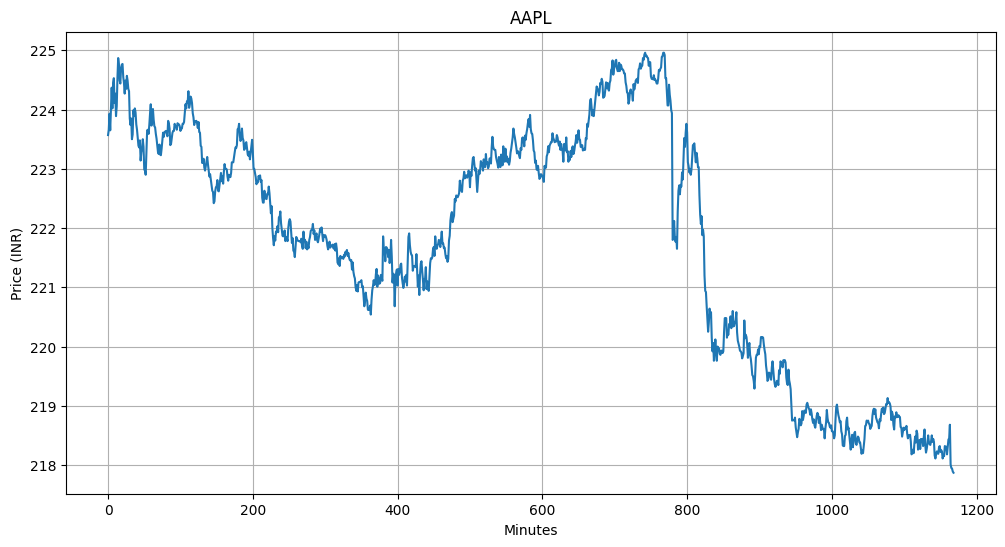

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['close'])
plt.title(f"{ticker}")
plt.xlabel("Minutes")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [ ]:
df

,open,low,high,close,volume
0,223.57,223.47,224.03,223.57,1261281
1,223.57,223.32,223.77,223.66,152883
2,223.69,223.60,223.97,223.93,162476
3,223.95,223.56,224.16,223.65,160980
4,223.65,223.55,224.03,224.03,156211
...,...,...,...,...,...
1164,218.67,217.81,218.68,218.01,432248
1165,217.99,217.87,218.01,217.95,283433
1166,217.93,217.92,218.13,217.94,326983
1167,217.96,217.83,217.98,217.89,431803


# Plotting moving averages of 100 day

---



In [ ]:
ma100 = df.close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1164    218.5236
1165    218.5169
1166    218.5086
1167    218.5001
1168    218.4902
Name: close, Length: 1169, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

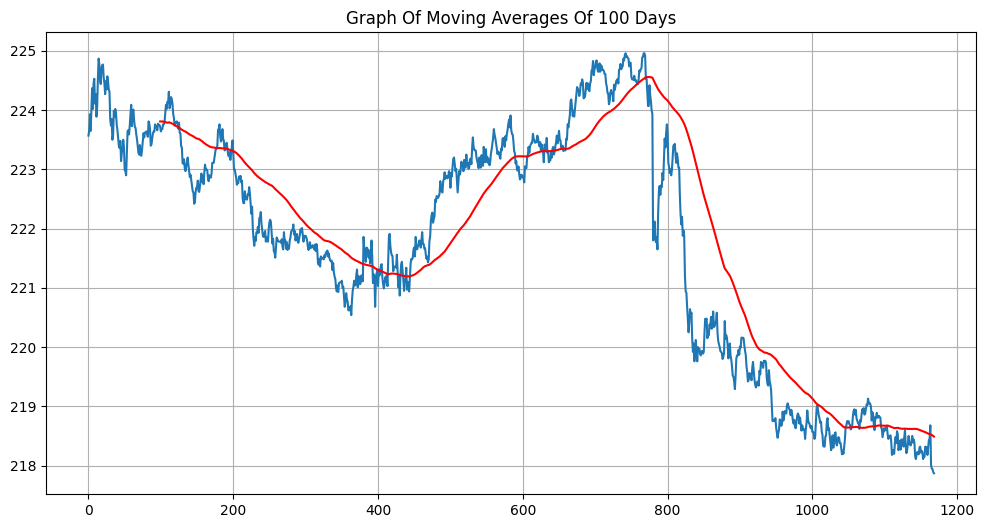

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [ ]:
ma200 = df.close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1164    218.58540
1165    218.58005
1166    218.57450
1167    218.56895
1168    218.56350
Name: close, Length: 1169, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

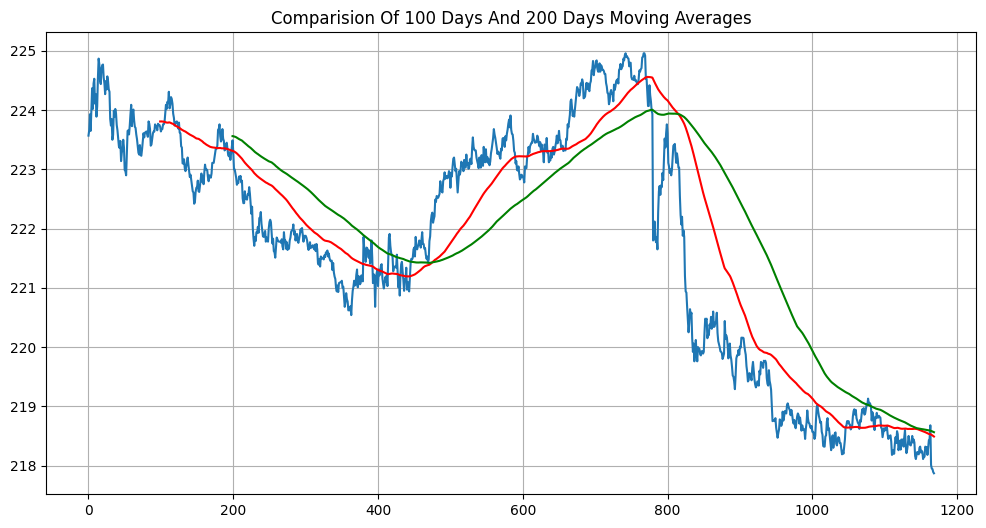

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [ ]:
df.shape

(1169, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(818, 6)
(351, 6)


In [ ]:
train.head()

,date,open,low,high,close,volume
0,2025-03-26 09:30:00,223.57,223.47,224.03,223.57,1261281
1,2025-03-26 09:31:00,223.57,223.32,223.77,223.66,152883
2,2025-03-26 09:32:00,223.69,223.60,223.97,223.93,162476
3,2025-03-26 09:33:00,223.95,223.56,224.16,223.65,160980
4,2025-03-26 09:34:00,223.65,223.55,224.03,224.03,156211


In [ ]:
test.head()

,date,open,low,high,close,volume
818,2025-03-28 10:09:00,222.51,222.18,222.51,222.23,151244
819,2025-03-28 10:10:00,222.21,221.94,222.30,222.07,154273
820,2025-03-28 10:11:00,222.02,221.98,222.24,222.20,124936
821,2025-03-28 10:12:00,222.18,221.88,222.18,221.88,63945
822,2025-03-28 10:13:00,221.85,221.85,222.16,221.97,91377


# Using MinMax scaler for normalization of the dataset

---



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
train_close

array([[223.57],
       [223.66],
       [223.93],
       [223.65],
       [224.03],
       [224.37],
       [224.02],
       [224.45],
       [224.53],
       [224.11],
       [224.27],
       [223.89],
       [224.06],
       [224.54],
       [224.87],
       [224.77],
       [224.49],
       [224.44],
       [224.71],
       [224.76],
       [224.77],
       [224.55],
       [224.45],
       [224.27],
       [224.49],
       [224.35],
       [224.57],
       [224.49],
       [224.35],
       [224.31],
       [223.85],
       [223.74],
       [223.85],
       [223.5 ],
       [223.58],
       [223.99],
       [223.89],
       [224.02],
       [223.95],
       [223.75],
       [223.66],
       [223.53],
       [223.39],
       [223.36],
       [223.48],
       [223.14],
       [223.28],
       [223.34],
       [223.5 ],
       [223.37],
       [222.99],
       [222.97],
       [222.9 ],
       [223.28],
       [223.65],
       [223.66],
       [223.59],
       [223.74],
       [223.93

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.68552036],
       [0.70588235],
       [0.76696833],
       [0.70361991],
       [0.78959276],
       [0.86651584],
       [0.78733032],
       [0.88461538],
       [0.90271493],
       [0.80769231],
       [0.8438914 ],
       [0.75791855],
       [0.79638009],
       [0.90497738],
       [0.97963801],
       [0.95701357],
       [0.89366516],
       [0.88235294],
       [0.94343891],
       [0.95475113],
       [0.95701357],
       [0.90723982],
       [0.88461538],
       [0.8438914 ],
       [0.89366516],
       [0.86199095],
       [0.91176471],
       [0.89366516],
       [0.86199095],
       [0.85294118],
       [0.74886878],
       [0.7239819 ],
       [0.74886878],
       [0.66968326],
       [0.68778281],
       [0.78054299],
       [0.75791855],
       [0.78733032],
       [0.77149321],
       [0.72624434],
       [0.70588235],
       [0.67647059],
       [0.64479638],
       [0.63800905],
       [0.66515837],
       [0.58823529],
       [0.6199095 ],
       [0.633

In [ ]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [ ]:
x_train.shape

(718, 100, 1)

# ML Model (LSTM)

---



In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/mnt/d/Code/Machine Learning/quantjl/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 583ms/step - loss: 0.1946 - mean_absolute_error: 0.3635
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 514ms/step - loss: 0.0425 - mean_absolute_error: 0.1688
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 208ms/step - loss: 0.0275 - mean_absolute_error: 0.1308
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - loss: 0.0186 - mean_absolute_error: 0.1002
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - loss: 0.0195 - mean_absolute_error: 0.1027
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 184ms/step - loss: 0.0204 - mean_absolute_error: 0.1086
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - loss: 0.0183 - mean_absolute_error: 0.1044
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 0.0169 - mean_absolute_error: 0.0978
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 0.0160 - mean_absolute_error: 0.0949
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - loss: 0.0159 - mean_absolute_error: 0.0938
Epoch 11/100
23/

In [ ]:
model.save(f'{ticker}_keras_model.keras')

In [ ]:
test_close.shape

(351, 1)

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])
past_100_days

,0
0,224.28
1,224.10
2,224.15
3,224.30
4,224.34
...,...
95,223.27
96,223.18
97,223.03
98,223.03


In [ ]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [ ]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [ ]:
final_df.head()

,0
0,224.28
1,224.10
2,224.15
3,224.30
4,224.34


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.90409027],
       [0.8787024 ],
       [0.88575458],
       [0.90691114],
       [0.91255289],
       [0.90409027],
       [0.90409027],
       [0.88575458],
       [0.92524683],
       [0.91255289],
       [0.92101551],
       [0.93370945],
       [0.93653032],
       [0.93794076],
       [0.9280677 ],
       [0.96050776],
       [0.96332863],
       [0.97461213],
       [0.96191819],
       [0.96755994],
       [0.96897038],
       [0.98730606],
       [0.98307475],
       [0.99576869],
       [1.        ],
       [0.99153738],
       [0.99294781],
       [0.9887165 ],
       [0.98730606],
       [0.96897038],
       [0.977433  ],
       [0.977433  ],
       [0.94358251],
       [0.93794076],
       [0.9393512 ],
       [0.93653032],
       [0.94640339],
       [0.93511989],
       [0.93653032],
       [0.93229901],
       [0.92665726],
       [0.92665726],
       [0.93794076],
       [0.95909732],
       [0.95627645],
       [0.96191819],
       [0.96473907],
       [0.990

In [ ]:
input_data.shape

(451, 1)

# Testing the model

---



In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(351, 100, 1)
(351,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [ ]:
# Making predictions

y_pred = model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step


In [ ]:
y_pred.shape

(351, 1)

In [ ]:
y_test

array([0.61495063, 0.59238364, 0.61071932, 0.56558533, 0.57827927,
       0.56276446, 0.4696756 , 0.43300423, 0.43018336, 0.39633286,
       0.36812412, 0.33568406, 0.35825106, 0.39069111, 0.3751763 ,
       0.38222849, 0.32157969, 0.28913963, 0.30888575, 0.26657264,
       0.28913963, 0.31734838, 0.2877292 , 0.26657264, 0.30042313,
       0.29760226, 0.29619182, 0.28349788, 0.28067701, 0.29055007,
       0.29055007, 0.28490832, 0.28913963, 0.33427362, 0.36812412,
       0.36530324, 0.36812412, 0.32157969, 0.33286319, 0.32863188,
       0.35401975, 0.34696756, 0.37235543, 0.34414669, 0.35260931,
       0.38504937, 0.348378  , 0.34978843, 0.35825106, 0.36248237,
       0.38222849, 0.33427362, 0.3145275 , 0.30747532, 0.30042313,
       0.29055007, 0.28913963, 0.28631876, 0.27221439, 0.27785614,
       0.28490832, 0.36248237, 0.32016925, 0.32863188, 0.32299013,
       0.30465444, 0.27362482, 0.29760226, 0.30888575, 0.28067701,
       0.27080395, 0.2538787 , 0.23272214, 0.22990127, 0.21861

In [ ]:
y_pred

array([[0.6939341 ],
       [0.6874962 ],
       [0.6757449 ],
       [0.65986586],
       [0.64020133],
       [0.6184656 ],
       [0.5958065 ],
       [0.5719906 ],
       [0.545044  ],
       [0.51486975],
       [0.48315886],
       [0.45146853],
       [0.4204717 ],
       [0.39247045],
       [0.3699539 ],
       [0.35360157],
       [0.34322748],
       [0.3367225 ],
       [0.33135656],
       [0.32561067],
       [0.31865734],
       [0.31119967],
       [0.30431342],
       [0.29834005],
       [0.29322296],
       [0.28904253],
       [0.28581864],
       [0.2834099 ],
       [0.28162768],
       [0.28024778],
       [0.27918625],
       [0.2783863 ],
       [0.27775258],
       [0.2772445 ],
       [0.2772111 ],
       [0.27808106],
       [0.28005362],
       [0.28300503],
       [0.28606078],
       [0.28867078],
       [0.2903603 ],
       [0.2911361 ],
       [0.2911525 ],
       [0.29094216],
       [0.2905882 ],
       [0.29018155],
       [0.29010713],
       [0.290

In [ ]:
scaler.scale_

array([0.14104372])

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

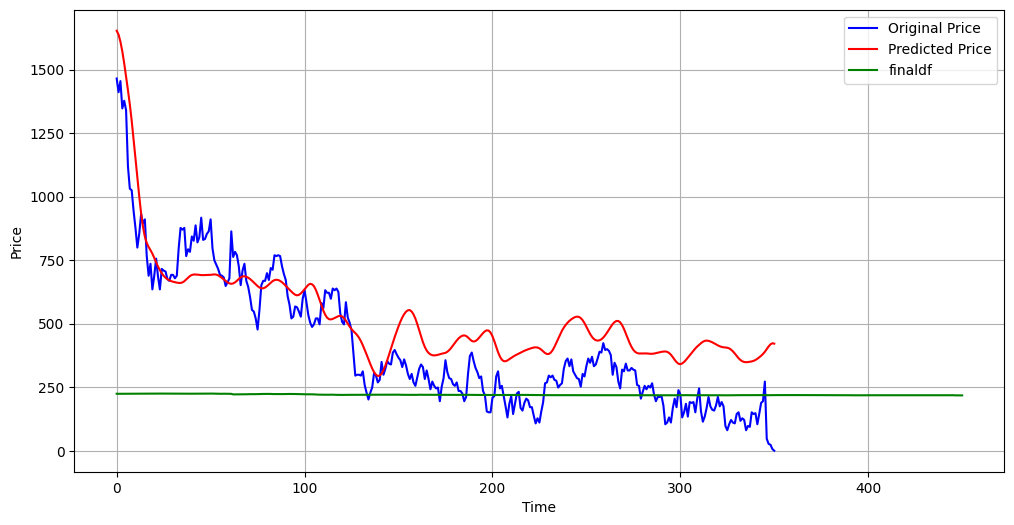

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.plot(final_df, 'g', label="finaldf")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 34.87%


Calculation of R2 score

In [ ]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.6088818407325451


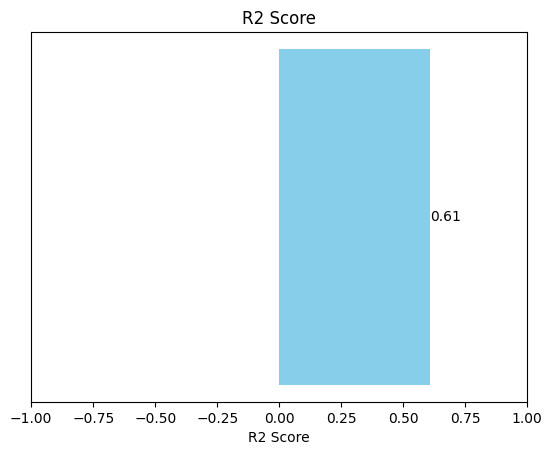

In [ ]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

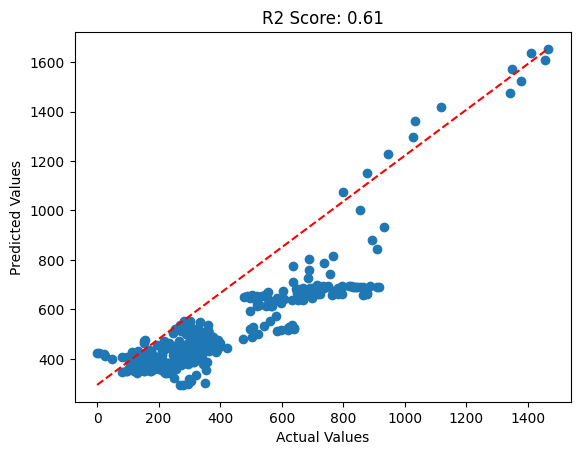

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()